<a href="https://colab.research.google.com/github/theonlybhishan/cats-dog-classification/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:06<00:00, 281MB/s]
100% 1.06G/1.06G [00:06<00:00, 185MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, BatchNormalization, Dropout

In [ ]:
#generators
train_ds= tf.keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    seed=None,
)
validation_ds= tf.keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    seed=None,
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
#NOrmalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create CNN model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding ='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 94s 145ms/step - loss: 1.5111 - accuracy: 0.5983 - val_loss: 0.5933 - val_accuracy: 0.6868
Epoch 2/10
625/625 [==============================] - 99s 158ms/step - loss: 0.5654 - accuracy: 0.7070 - val_loss: 0.5852 - val_accuracy: 0.6784
Epoch 3/10
625/625 [==============================] - 99s 158ms/step - loss: 0.4948 - accuracy: 0.7581 - val_loss: 0.6818 - val_accuracy: 0.6796
Epoch 4/10
625/625 [==============================] - 99s 158ms/step - loss: 0.4189 - accuracy: 0.8084 - val_loss: 0.4855 - val_accuracy: 0.7599
Epoch 5/10
625/625 [==============================] - 89s 142ms/step - loss: 0.3792 - accuracy: 0.8349 - val_loss: 0.3592 - val_accuracy: 0.8376
Epoch 6/10
625/625 [==============================] - 98s 157ms/step - loss: 0.3060 - accuracy: 0.8708 - val_loss: 0.3297 - val_accuracy: 0.8702
Epoch 7/10
625/625 [==============================] - 98s 157ms/step - loss: 0.2194 - accuracy: 0.9104 - val_loss: 0.2565 - val_ac

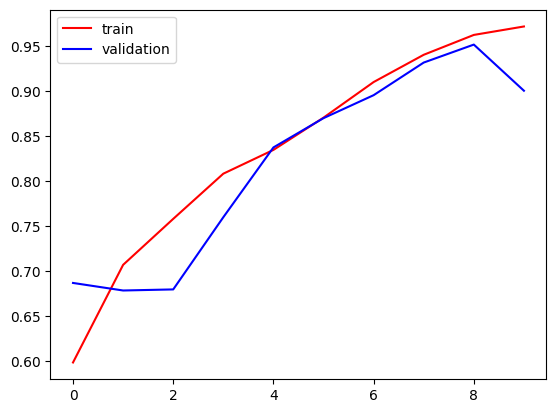

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

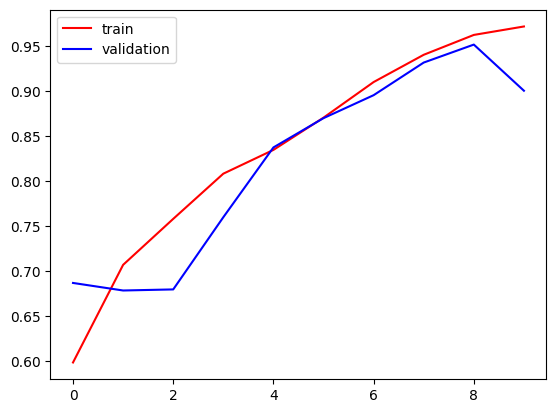

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

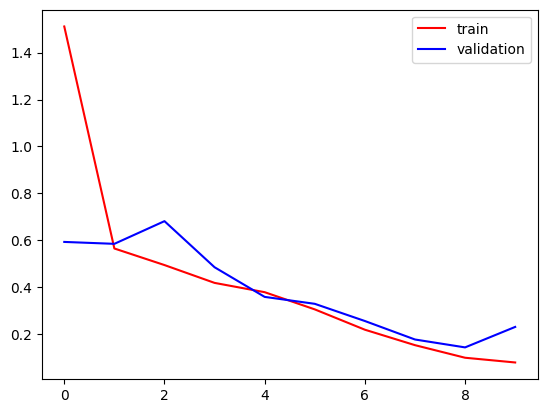

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

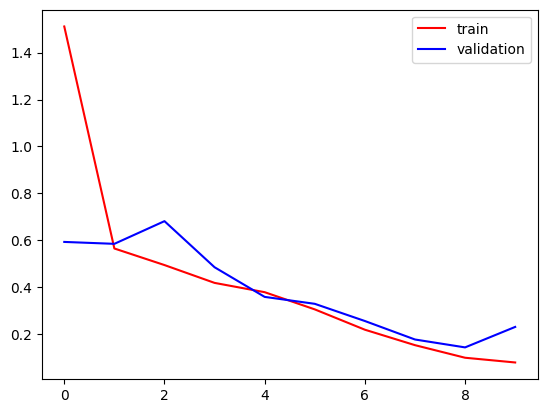

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

In [ ]:
test_img.shape

AttributeError: ignored

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 570ms/step


array([[1.]], dtype=float32)